# Introductory Gradient Descent

**Machine learning** is probably a phrase you have heard when talking about AI. However, you don't often hear about how a machine actually learns. This notebook intends to explain the most important technique that enables us to build all of the incredible AI technologies you see around us today: **gradient descent**.

## The Problem

**the data**:
You can see a plot below which shows a fake dataset depicting the square footage of a house and the cost of the house. What I want you to imagine is that each dot on the plot is an actual house of that size and sold for that price. For instance, the red dot indicates a real house that was 140ft^2 and sold for $160000. 

**the question**:
If I were to ask you what the price of a house that was 135ft^2 would be based on the data, you would probably say somewhere around $140,000. That is because all of the houses around that size sold for around that amount. The question is, how do we train a machine to think the same thing?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

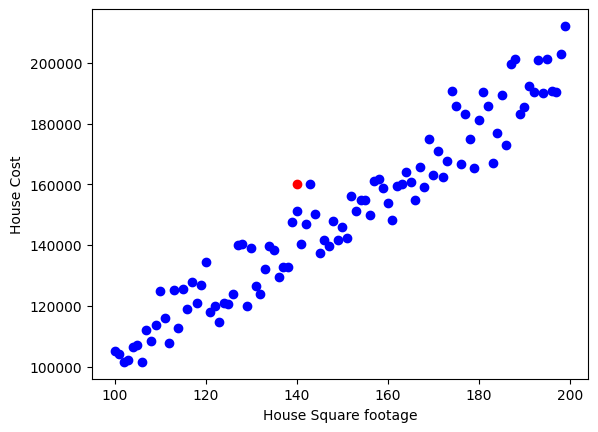

In [3]:
samples_x = np.array([float(x) for x in range(100, 200)])
samples_y = np.random.normal(samples_x * 1000 + 300, 8000)

plt.xlabel("House Square footage")
plt.ylabel("House Cost")
plt.scatter(samples_x, samples_y, c="b")
plt.scatter(140, 160000, c='r')
plt.show()

## Step 1: hypothesis

The first step to getting a machine to estimate the answer is to create a function that will take a house square footage, which we will call x, as an argument and will return the estimated cost of the house, which we will call y. This function is most commonly called the **hypothesis**

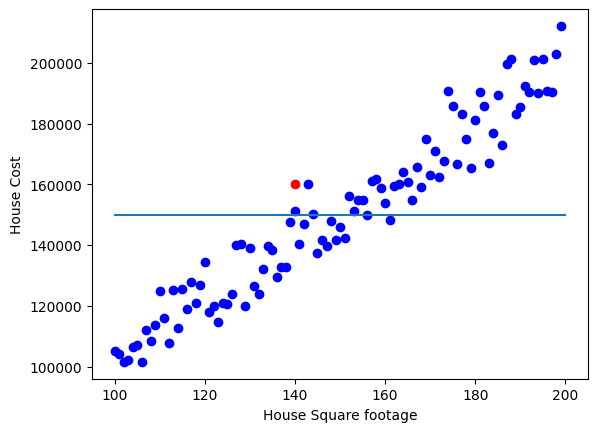

In [10]:

# This function is the hypothesis. It takes in x, which is the ft^2 of a house,
# and returns what the computer thinks the house cost will be. in this case, the computer's
# guess is just 150000, which is probably very wrong.
def estimate_house_cost(x):
    return 150000

plt.xlabel("House Square footage")
plt.ylabel("House Cost")
plt.scatter(samples_x, samples_y, c="b")
plt.scatter(140, 160000, c='r')
plt.plot([100, 200], [estimate_house_cost(100), estimate_house_cost(200)])
plt.show()

The code above creates a hypothesis that is very bad. The dots still represent real house sales and the line represents our hypothesis. If you give our hypothesis and x value, say x=200, it will find the corresponding spot on the line and that will be it's guess. What it is doing is saying every house, regardless of size, will sell for $150,000 dollars. The calculation does not take the house size into consideration. So what is a good hypothesis? Well, it depends on the data. For now, I will just say that the best is a simple line: **y=mx+b**. Below is a better hypothesis.

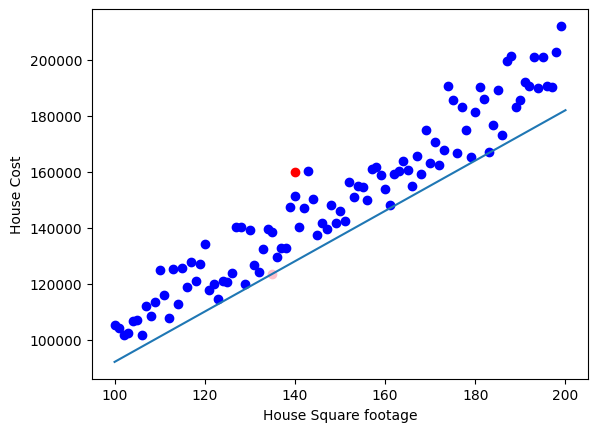

In [11]:
def better_estimate_house_cost(x):
    m, b = 900, 2000
    return m * x + b

plt.xlabel("House Square footage")
plt.ylabel("House Cost")
plt.scatter(samples_x, samples_y, c="b")
plt.scatter(140, 160000, c='r')
plt.plot([100, 200], [better_estimate_house_cost(100), better_estimate_house_cost(200)])
plt.scatter(135, better_estimate_house_cost(135), c='pink')
plt.show()

Here we can see that our new hypothesis where y = 900 * x + 2000 yields a better estimate. To understand the diagram better, we can see a pink dot representing an estimate made by our hypothesis. The model took in x=135 representing the house ft^2, and it chose the spot on the line corresponding to x=135. When seeing this, you should have two questions come to mind: where did the numbers 900 and 2000 come from and is this model the best that we can make? The numbers just came from me choosing them but they are far from the best numbers. Our next step is not just finding better numbers for m and b, but how to write a program to find those better numbers.

## Step 2: The error function

The next crucial equation in order to create a machine learning model is the error function. This function is exactly what it sounds like. It quantifies the error (or how wrong) our hypothesis is based on the data. There are a number of error functions to choose from but for our problem I am choosing error = $\sum_{i=1}^{n}$ $\frac{(y_i - y_h(x_i))^2}{2n}$. Let's discuss what this function is and later I will explain why I chose this particular one.

First, the most important part of the equation is $(y_i - y_h(x_i))$. In this equation, $y_h(x)$ is our hypothesis. The $\sum_{i=1}^n$ is saying look at every sample in our data. In this case, it is looking at all of the blue dots in our data.